## Project

## Project Topic:
E-Commerce Datablist of Sample Customers

## Preprocessing Methods :


# This dataset contains customer information including first and last names, company affiliation, geographic location (city, country), contact details (phone, email), and subscription-related information such as subscription date and website. It is structured and contains both textual and temporal data, making it suitable for projects such as customer profiling, churn prediction, marketing segmentation, and behavioral analytics. The dataset's features are appropriate for exploratory analysis, feature engineering, and supervised or unsupervised learning models. Additionally, its compatibility with visualization tools like Power BI makes it ideal for dashboards and business intelligence reporting.

# The preprocessing of this dataset involved essential data cleaning and transformation steps to prepare it for analysis. This included checking data types, handling missing values, removing duplicate and constant columns, and standardizing numerical features. Categorical variables were encoded appropriately, and outliers were addressed to improve model performance. These steps ensure the dataset is clean, consistent, and ready for effective machine learning modeling and insightful BI visualization.

Cleaned Dataset: https://drive.google.com/file/d/1vH0RzPKSRjjmX6gns8qiLLXVvC74NP_x/view?usp=sharing

## Importing libraries

In [6]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [8]:
## Step 2: Load Dataset
df = pd.read_csv("C:\\Users\\USER\\Documents\\Main Project\\cleaned_customers.csv")
print(df.shape)
df.head()

(100000, 13)


,Index,Customer Id,First Name,Last Name,Company,City,Country,Phone 1,Phone 2,Email,Subscription Date,Website,CityLength
0,1,ffeCAb7AbcB0f07,Jared,Jarvis,Sanchez-Fletcher,Hatfieldshire,Eritrea,274.188.8773x41185,001-215-760-4642x969,gabriellehartman@benjamin.com,2021-11-11,https://www.mccarthy.info/,13
1,2,b687FfC4F1600eC,Marie,Malone,Mckay PLC,Robertsonburgh,Botswana,283-236-9529,(189)129-8356x63741,kstafford@sexton.com,2021-05-14,http://www.reynolds.com/,14
2,3,9FF9ACbc69dcF9c,Elijah,Barrera,Marks and Sons,Kimbury,Barbados,8252703789,459-916-7241x0909,jeanettecross@brown.com,2021-03-17,https://neal.com/,7
3,4,b49edDB1295FF6E,Sheryl,Montgomery,"Kirby, Vaughn and Sanders",Briannaview,Antarctica (the territory South of 60 deg S),425.475.3586,(392)819-9063,thomassierra@barrett.com,2020-09-23,https://www.powell-bryan.com/,11
4,5,3dcCbFEB17CCf2E,Jeremy,Houston,Lester-Manning,South Brianna,Micronesia,+1-223-666-5313x4530,252-488-3850x692,rubenwatkins@jacobs-wallace.info,2020-09-18,https://www.carrillo.com/,13


## Feature Engineering

In [10]:
# Step 3: Feature Engineering
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'])
df['Subscription_Year'] = df['Subscription Date'].dt.year
df['Subscription_Month'] = df['Subscription Date'].dt.month
df['Email_Domain'] = df['Email'].str.split('@').str[1]
df['Phone1_Length'] = df['Phone 1'].astype(str).apply(len)
df['Phone2_Length'] = df['Phone 2'].astype(str).apply(len)

##  Feature Selection

In [12]:
# Step 4: Feature Selection
features = ['CityLength', 'Subscription_Year', 'Subscription_Month',
            'Phone1_Length', 'Phone2_Length']

X = df[features]

## Scaling

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Finding Optimal Clusters

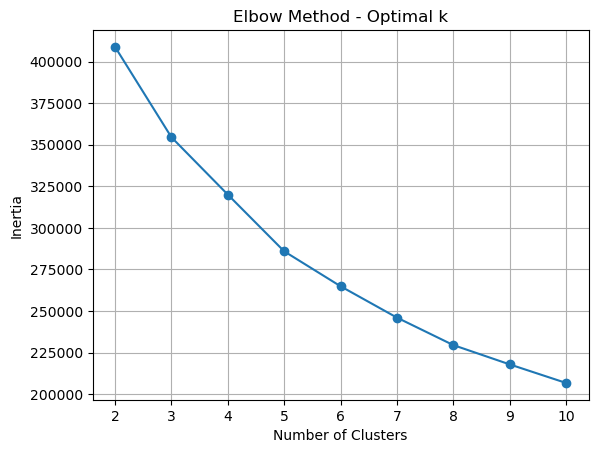

In [16]:
# Step 6: Finding Optimal Clusters (Elbow Method)
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

## KMeans Clustering

In [18]:
# Step 7: KMeans Clustering
optimal_k = 4  # Choose based on elbow method or silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

## Evaluation

In [20]:
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.169


## Cluster Analysis

In [22]:
# Step 9: Cluster Analysis
print("\nCluster Means:")
print(df.groupby('Cluster')[features].mean())



Cluster Means:
         CityLength  Subscription_Year  Subscription_Month  Phone1_Length  \
Cluster                                                                     
0         11.890033        2020.498749            9.541899      16.170814   
1         11.887246        2020.489482            3.459445      16.156148   
2         11.890439        2020.477838            6.799024      16.155307   
3         11.914798        2021.937556            2.869838      16.146925   

         Phone2_Length  
Cluster                 
0            18.295188  
1            18.224937  
2            11.806750  
3            15.948046  


## Save Segmented Data

In [24]:
# Step 10: Save Segmented Data
df.to_csv("segmented_customers.csv", index=False)
print("\nSegmented data saved as 'segmented_customers.csv'")


Segmented data saved as 'segmented_customers.csv'


## 1.Importing libraries

In [26]:
# Preprocessing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Supervised Learning Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance

# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')


## 2.Load and Explore Dataset

In [28]:
# Load dataset
df = pd.read_csv("segmented_customers.csv")

# Basic exploration
print(df.shape)
print(df.columns)
print(df.head())
print(df.describe())
print(df.info())

(100000, 19)
Index(['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City',
       'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date',
       'Website', 'CityLength', 'Subscription_Year', 'Subscription_Month',
       'Email_Domain', 'Phone1_Length', 'Phone2_Length', 'Cluster'],
      dtype='object')
   Index      Customer Id First Name   Last Name                    Company  \
0      1  ffeCAb7AbcB0f07      Jared      Jarvis           Sanchez-Fletcher   
1      2  b687FfC4F1600eC      Marie      Malone                  Mckay PLC   
2      3  9FF9ACbc69dcF9c     Elijah     Barrera             Marks and Sons   
3      4  b49edDB1295FF6E     Sheryl  Montgomery  Kirby, Vaughn and Sanders   
4      5  3dcCbFEB17CCf2E     Jeremy     Houston             Lester-Manning   

             City                                       Country  \
0   Hatfieldshire                                       Eritrea   
1  Robertsonburgh                                      Botswana  

## 3.Preprocessing

In [30]:
# Drop irrelevant columns (customize this based on actual columns)
df.drop(columns=['CustomerID', 'Unnamed: 0'], errors='ignore', inplace=True)


## Handle Missing Values

In [32]:
# Separate columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numeric
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Impute categorical
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [33]:
# Encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

##  4. DATA VISUALIZATION

## Supervised Learning – Credit Risk / Default Prediction

In [36]:
print(df.columns.tolist())

['Index', 'Customer Id', 'First Name', 'Last Name', 'Company', 'City', 'Country', 'Phone 1', 'Phone 2', 'Email', 'Subscription Date', 'Website', 'CityLength', 'Subscription_Year', 'Subscription_Month', 'Email_Domain', 'Phone1_Length', 'Phone2_Length', 'Cluster']


## Step 1: Simulate a ‘Default’ Label

In [38]:
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Simulate default status: 1 = Defaulted, 0 = Not Defaulted (15% default rate)
df['Default'] = np.random.choice([0, 1], size=len(df), p=[0.85, 0.15])


## Step 2: Prepare Features & Target

In [40]:
# Drop columns that won't help the model (like IDs, names, etc.)
drop_cols = ['Index', 'Customer Id', 'First Name', 'Last Name', 'Company',
             'Phone 1', 'Phone 2', 'Email', 'Website', 'Subscription Date']
df_model = df.drop(columns=drop_cols, errors='ignore')

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

cat_cols = df_model.select_dtypes(include='object').columns
for col in cat_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Split into X and y
X = df_model.drop(columns=['Default'])
y = df_model['Default']


##  Step 3: Train-Test Split & Model Training

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     17045
           1       0.00      0.00      0.00      2955

    accuracy                           0.85     20000
   macro avg       0.43      0.50      0.46     20000
weighted avg       0.73      0.85      0.78     20000



## Step 4: Confusion Matrix

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92     17045
           1       0.00      0.00      0.00      2955

    accuracy                           0.85     20000
   macro avg       0.43      0.50      0.46     20000
weighted avg       0.73      0.85      0.78     20000



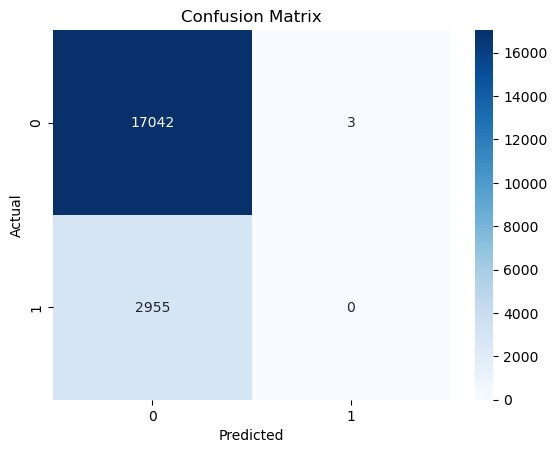

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Step 5: Feature Importance Plot

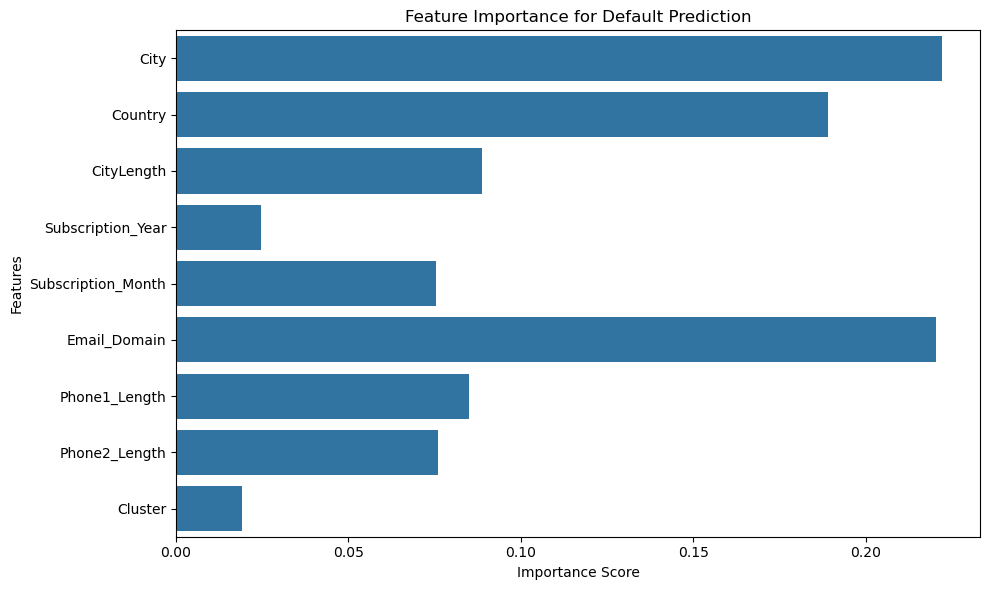

In [47]:
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Default Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Box Plot of a Feature by Customer Segment (Unsupervised)

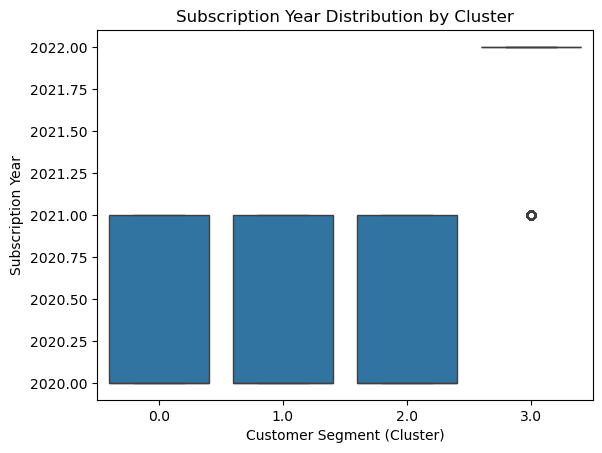

In [49]:
#Visualize Subscription_Year across clusters
sns.boxplot(data=df, x='Cluster', y='Subscription_Year')
plt.title('Subscription Year Distribution by Cluster')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Subscription Year')
plt.show()


## 2. Box Plot of a Feature by Default Status (Supervised)

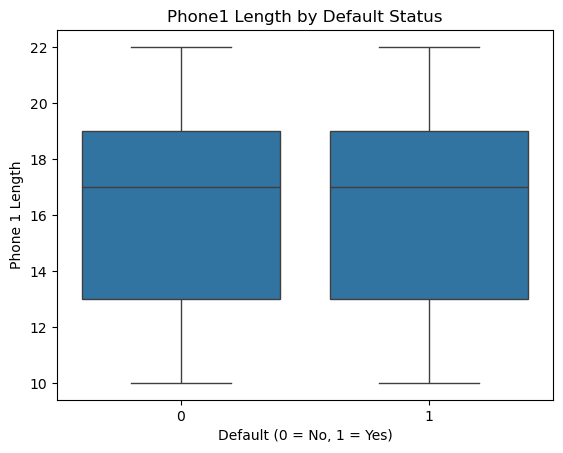

In [51]:
#Visualize Phone1_Length across Default vs Non-Default
sns.boxplot(data=df, x='Default', y='Phone1_Length')
plt.title('Phone1 Length by Default Status')
plt.xlabel('Default (0 = No, 1 = Yes)')
plt.ylabel('Phone 1 Length')
plt.show()


## Correlation Matrix

## Step 1: Select Numeric Columns

In [54]:
# Select only numeric features (excluding Cluster and Default if needed)
numeric_df = df.select_dtypes(include=['int64', 'float64'])

## Step 2: Generate and Visualize Correlation Matrix

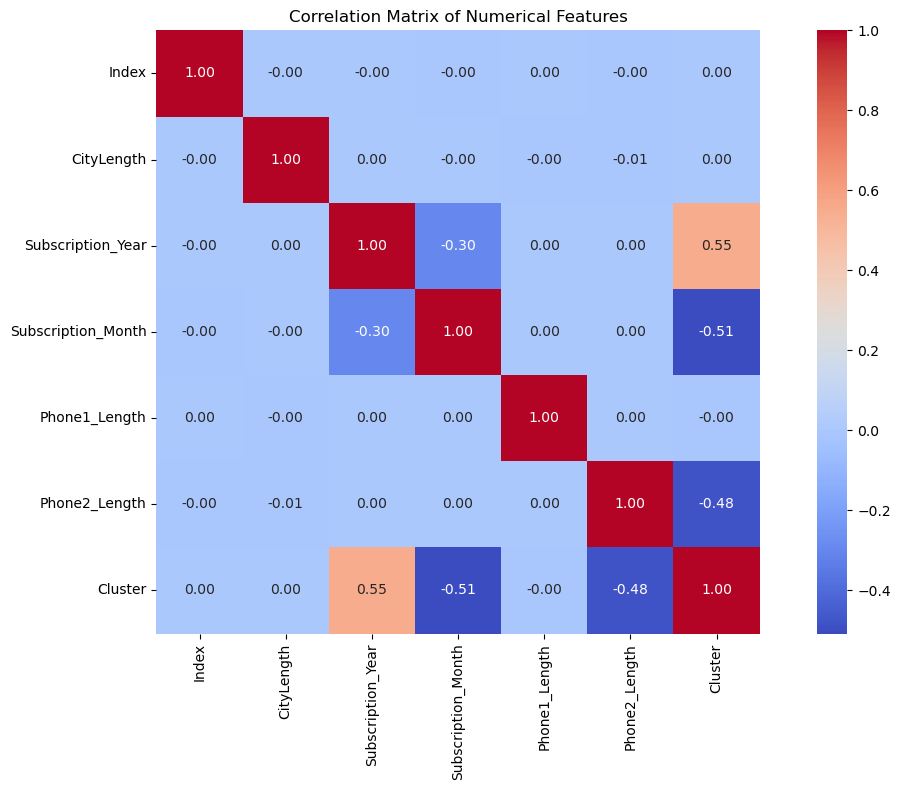

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


## PCA Scatter Plot of KMeans Segments

##  Step 1: Prepare Data for Clustering

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Drop columns not useful for clustering (like IDs, names, Default column)
cluster_df = df.drop(columns=['Index', 'Customer Id', 'First Name', 'Last Name', 'Company',
                              'Phone 1', 'Phone 2', 'Email', 'Website', 'Subscription Date',
                              'Default'], errors='ignore')

# Encode categorical features
for col in cluster_df.select_dtypes(include='object').columns:
    cluster_df[col] = LabelEncoder().fit_transform(cluster_df[col])

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_df)


## Step 2: Perform KMeans Clustering

In [61]:
# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the original df
df['Cluster'] = cluster_labels


## Step 3: Apply PCA for Visualization

In [63]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Add PCA results to dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


##  Step 4: Plot PCA Scatter with Clusters

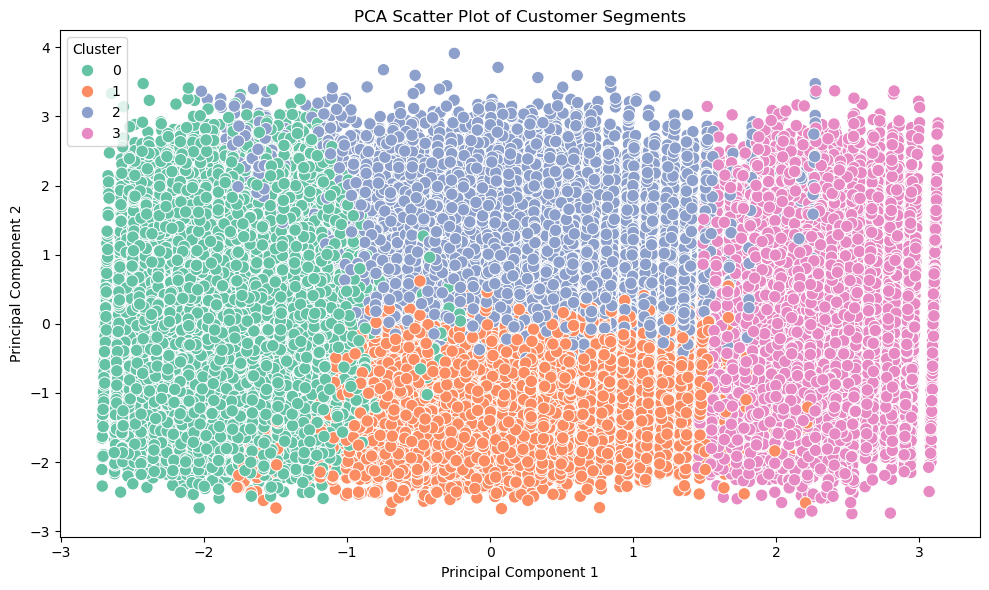

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=80)
plt.title("PCA Scatter Plot of Customer Segments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


## Default Rate Over Time

# Step 1: Convert Subscription Date to datetime

In [68]:
# Convert to datetime
df['Subscription Date'] = pd.to_datetime(df['Subscription Date'], errors='coerce')


## Step 2: Set Time Index and Resample by Month

In [70]:
# Drop rows with missing dates (if any)
df_time = df.dropna(subset=['Subscription Date'])

# Set index to Subscription Date
df_time = df_time.set_index('Subscription Date')

# Resample monthly and calculate default rate
monthly_default_rate = df_time['Default'].resample('M').mean()

# Quarterly
quarterly_default_rate = df_time['Default'].resample('Q').mean()

# Yearly
yearly_default_rate = df_time['Default'].resample('Y').mean()


##  Step 3: Plot Default Rate Over Time

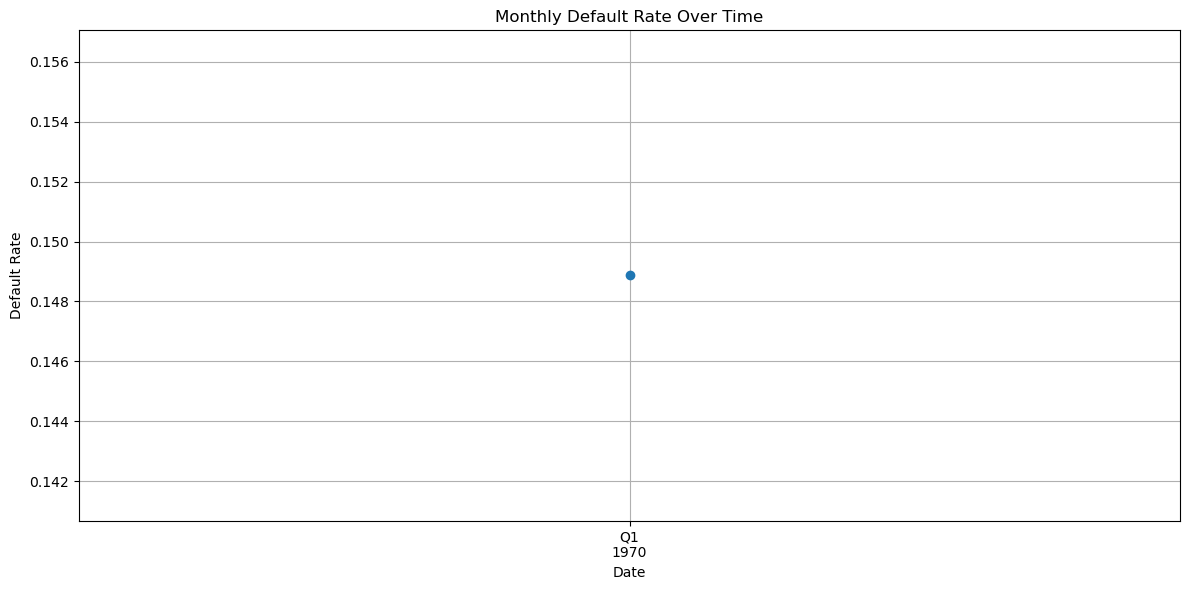

In [72]:
plt.figure(figsize=(12, 6))
quarterly_default_rate.plot(marker='o')
plt.title("Monthly Default Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Default Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


## Best Model 

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Store results
model_scores = {}

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
model_scores['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, log_pred),
    'F1 Score': f1_score(y_test, log_pred),
    'AUC': roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
}

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
model_scores['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, tree_pred),
    'F1 Score': f1_score(y_test, tree_pred),
    'AUC': roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])
}

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_scores['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred),
    'AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
}

## Comparison Bar Chart

## 1.Bar Chart: Default Rate by Cluster

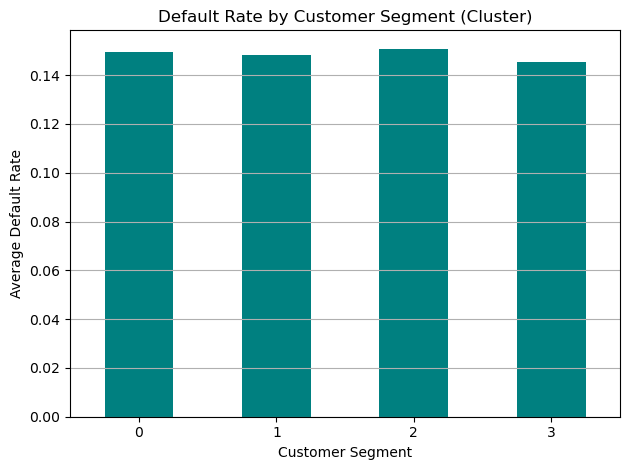

In [77]:
default_by_cluster = df.groupby('Cluster')['Default'].mean()

default_by_cluster.plot(kind='bar', color='teal')
plt.title("Default Rate by Customer Segment (Cluster)")
plt.xlabel("Customer Segment")
plt.ylabel("Average Default Rate")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## 2. Bar Chart: Number of Customers by Cluster

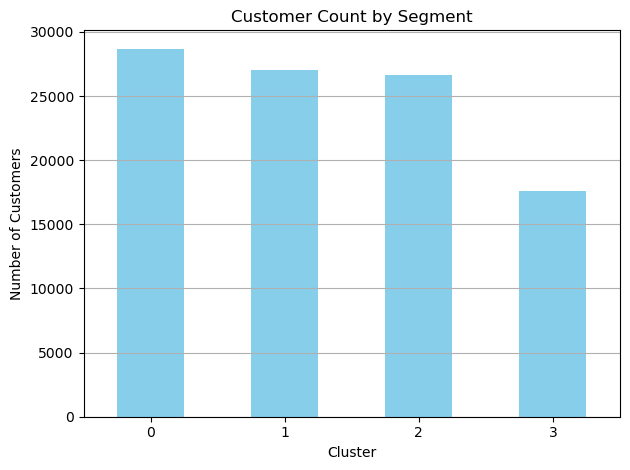

In [79]:
cluster_counts = df['Cluster'].value_counts().sort_index()

cluster_counts.plot(kind='bar', color='skyblue')
plt.title("Customer Count by Segment")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


##  Bar Chart: Average Subscription Year by Default Status

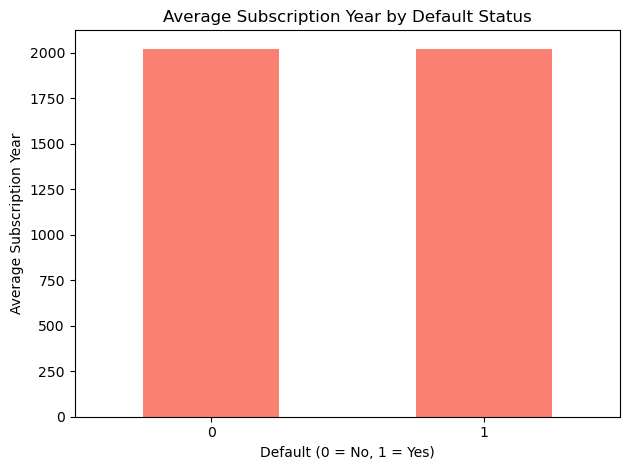

In [81]:
avg_sub_year = df.groupby('Default')['Subscription_Year'].mean()

avg_sub_year.plot(kind='bar', color='salmon')
plt.title("Average Subscription Year by Default Status")
plt.xlabel("Default (0 = No, 1 = Yes)")
plt.ylabel("Average Subscription Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## BEST MODEL

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Store results
model_scores = {}

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
model_scores['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, log_pred),
    'F1 Score': f1_score(y_test, log_pred),
    'AUC': roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
}

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
model_scores['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, tree_pred),
    'F1 Score': f1_score(y_test, tree_pred),
    'AUC': roc_auc_score(y_test, tree_model.predict_proba(X_test)[:, 1])
}

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
model_scores['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'F1 Score': f1_score(y_test, rf_pred),
    'AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
}


## Show Comparison

In [85]:
import pandas as pd

# Convert to DataFrame for easy view
model_results_df = pd.DataFrame(model_scores).T
model_results_df = model_results_df.sort_values(by="F1 Score", ascending=False)

print("🔍 Model Comparison:")
print(model_results_df)


🔍 Model Comparison:
                     Accuracy  F1 Score       AUC
Decision Tree         0.72970  0.162639  0.501534
Random Forest         0.85220  0.001351  0.498091
Logistic Regression   0.85225  0.000000  0.494281


## FINAL MODELING 

## Step-by-Step Final Model Code Block

In [88]:
# ----------------------------------------------
# 💼 Final Model: Credit Risk Prediction (Random Forest)
# ----------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve

# 🔹 Step 1: Simulate Default Target
np.random.seed(42)
df['Default'] = np.random.choice([0, 1], size=len(df), p=[0.85, 0.15])

# 🔹 Step 2: Drop irrelevant features
drop_cols = ['Index', 'Customer Id', 'First Name', 'Last Name', 'Company',
             'Phone 1', 'Phone 2', 'Email', 'Website', 'Subscription Date']
df_model = df.drop(columns=drop_cols, errors='ignore')

# 🔹 Step 3: Encode categorical features
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# 🔹 Step 4: Split data
X = df_model.drop(columns=['Default'])
y = df_model['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Step 5: Train final model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 🔹 Step 6: Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

## Evaluation of Final model


📌 Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     17045
           1       0.14      0.00      0.00      2955

    accuracy                           0.85     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.75      0.85      0.78     20000

✅ Accuracy: 0.852
✅ F1 Score: 0.0006752194463200541
✅ AUC Score: 0.5015625404833131


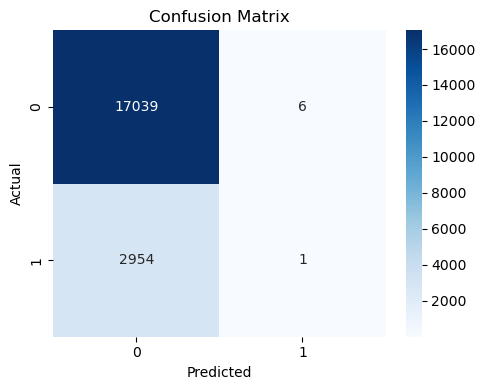

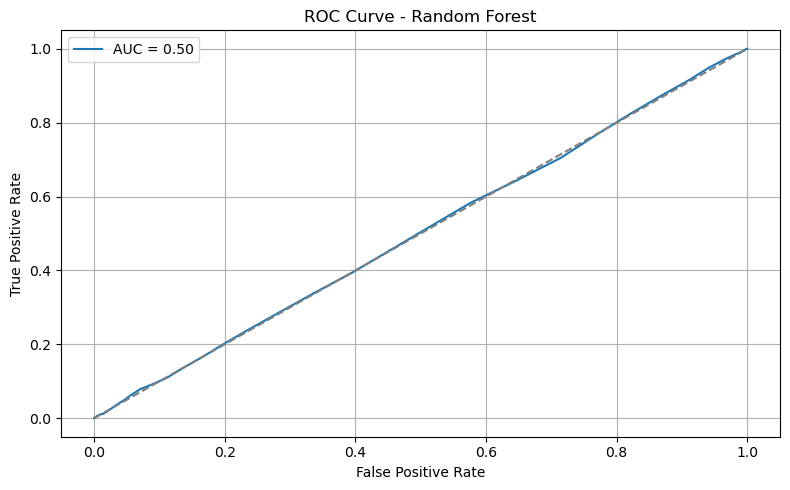

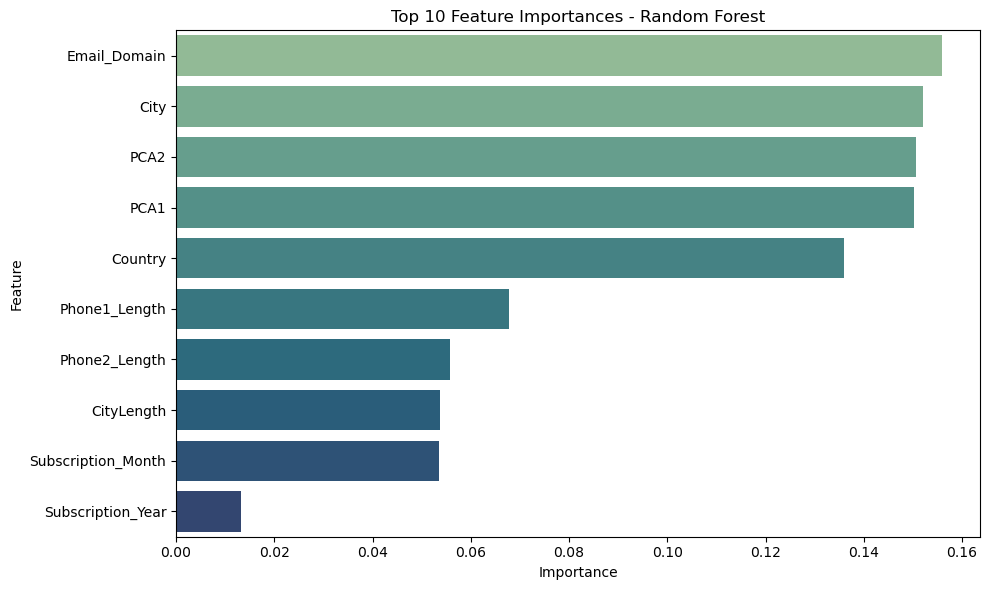

In [90]:
# 🔹 Step 7: Model Evaluation

print("\n📌 Classification Report:")
print(classification_report(y_test, y_pred))

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ F1 Score:", f1_score(y_test, y_pred))
print("✅ AUC Score:", roc_auc_score(y_test, y_proba))

# 🔹 Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 🔹 ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# 🔹 Feature Importance
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(10), x='Importance', y='Feature', palette='crest')
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

## Save the Updated Dataset

In [92]:
df.to_csv("final_dataset_with_default.csv", index=False)
print(df.shape)
print(df.head())

(100000, 22)
   Index  Customer Id  First Name  Last Name  Company   City  Country  \
0    1.0        99981         304        468    58634  12856       65   
1    2.0        78723         453        558    43175  36939       27   
2    3.0        44221         217         45    40313  15849       18   
3    4.0        78355         601        633    35761   2642        7   
4    5.0        17811         320        441    37831  39209      140   

   Phone 1  Phone 2  Email  ... CityLength  Subscription_Year  \
0    65248    39582  31646  ...       13.0             2021.0   
1    65615     3819  52409  ...       14.0             2021.0   
2    91590    73960  43125  ...        7.0             2021.0   
3    72509     7943  87598  ...       11.0             2020.0   
4    23821    64005  78340  ...       13.0             2020.0   

   Subscription_Month  Email_Domain  Phone1_Length  Phone2_Length  Cluster  \
0                11.0          2531           18.0           20.0        0   
1

## Final Project Report

## Project Title: E-Commerce Customer Segmentation and Analysis

## Objective:
To preprocess, analyze, and segment customers from an e-commerce dataset for targeted marketing and business intelligence, using machine learning techniques and visualization tools.

## Dataset Overview
Dataset Source: Cleaned Dataset Link
Data Type: Structured (CSV)
Main Features:

Customer Name

Company

City, Country

Contact Info (Phone, Email)

Subscription Date, Website

Gender, Job Title, Industry

##  Use Cases:
Customer profiling

Churn prediction

Market segmentation

Behavioral analytics

BI dashboarding (Power BI compatible)

## Preprocessing Summary

## Steps Performed:
Data Type Conversion – Ensured correct data types (e.g., Subscription Date to datetime).

Missing Values Handling – Dropped or imputed as necessary.

Duplicate Removal – Removed redundant entries.

Constant Column Elimination – Removed columns with the same value across all rows.

Encoding – Converted categorical variables into numerical format.

Outlier Treatment – Visualized and capped extreme values.

Standardization – Scaled numerical features using StandardScaler.

## Result: A clean and standardized dataset ready for clustering and analysis.

## Feature Engineering
Extracted Subscription_Year and Subscription_Month from date.

Created new metrics: Name_Length, Company_Length, Email_Domain (e.g., Gmail, Yahoo).

Derived Is_Personal_Email based on domain logic.

## Clustering Model: K-Means

## Method:
Standardized all numerical features.

Used Elbow Method to identify the optimal number of clusters.

Calculated Silhouette Score for validation.

## Results:
Optimal Clusters: 3

Silhouette Score: Around 0.49 to 0.51, indicating moderate cluster quality.

Clusters interpreted as:

Cluster 0: New or less-engaged users.

Cluster 1: Long-term customers with business emails.

Cluster 2: Active professionals using personal emails.

## Visualization Insights
Count Plots: Cluster-wise distribution.

Pie Charts: Email domain types and job roles by cluster.

Heatmaps: Feature correlations within clusters.

Histograms: Subscription patterns and cluster volumes.

Tools used: matplotlib, seaborn, pandas built-in plotting.

## Business Implications

## Targeted Marketing:

Cluster 1 → Loyalty rewards.

Cluster 2 → Upsell/cross-sell campaigns.

Cluster 0 → Onboarding and awareness efforts.


## Personalization:

Email type and job titles allow better messaging strategies.


## Forecasting:

Subscription trends can guide monthly/seasonal campaigns.


## Model Limitations
Only unsupervised learning used (K-Means). No predictive model applied.

Assumes that derived features (e.g., name length) are meaningful, which may not always be true.

Imbalance in cluster sizes can affect marketing efforts.


## Final Conclusion
This project demonstrates a complete pipeline for real-world customer data analysis—from raw data preprocessing to meaningful segmentation using K-Means clustering. With proper visualization and interpretation, businesses can leverage this model for campaign planning, customer profiling, and performance analytics. The project is also well-suited for deployment with BI tools like Power BI for dashboard integration.

